In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc("axes", unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 5000
pd.options.display.max_rows = 1000

In [4]:
train = pd.read_excel("Downloads/데이터분석.xlsx", sheet_name = "고객확보및유지")
train = train.iloc[:,2 :]
print(train.shape)
train.head(2)

(42, 22)


,GMV (취소포함),사용자 유입수,구매전환율,주문건수 (취소포함),Quick ratio,90D active customer,1. 기간별 신규구매자수,2. 기존 90D active customer,기존 90D active customer 비율,2-1. 기간별 기존구매자수,3. 기간별 부활구매자수,4. 기간별 소멸구매자수,1A. 기간별\n신규유입,1B. 회원가입 전환율,1C. 신규회원 구매전환율,2A. 기간별\n기존유입,2B. 기존 구매전환율,3A. 기간별\n부활유입,3B. 부활 구매전환율,전체CAC,신규CAC,신규비용(수식계산용)
0,337388780,218078,0.023487,5122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492908190,452930,0.018084,8191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy='mean')

for i in train.columns:
    if train[i].isnull().sum() !=0:
        train[i] = train[i].fillna(train[i].mean())
        
        
from sklearn.preprocessing import StandardScaler
#
label_name = "GMV (취소포함)"
feature_names = train.columns.difference(["GMV (취소포함)", "주문건수 (취소포함)"])
#
train_x = train[feature_names]
train_y = train[label_name] 
#
train_x_std = StandardScaler().fit_transform(train_x)
train_x_std_final = pd.DataFrame(train_x_std, columns = train_x.columns)

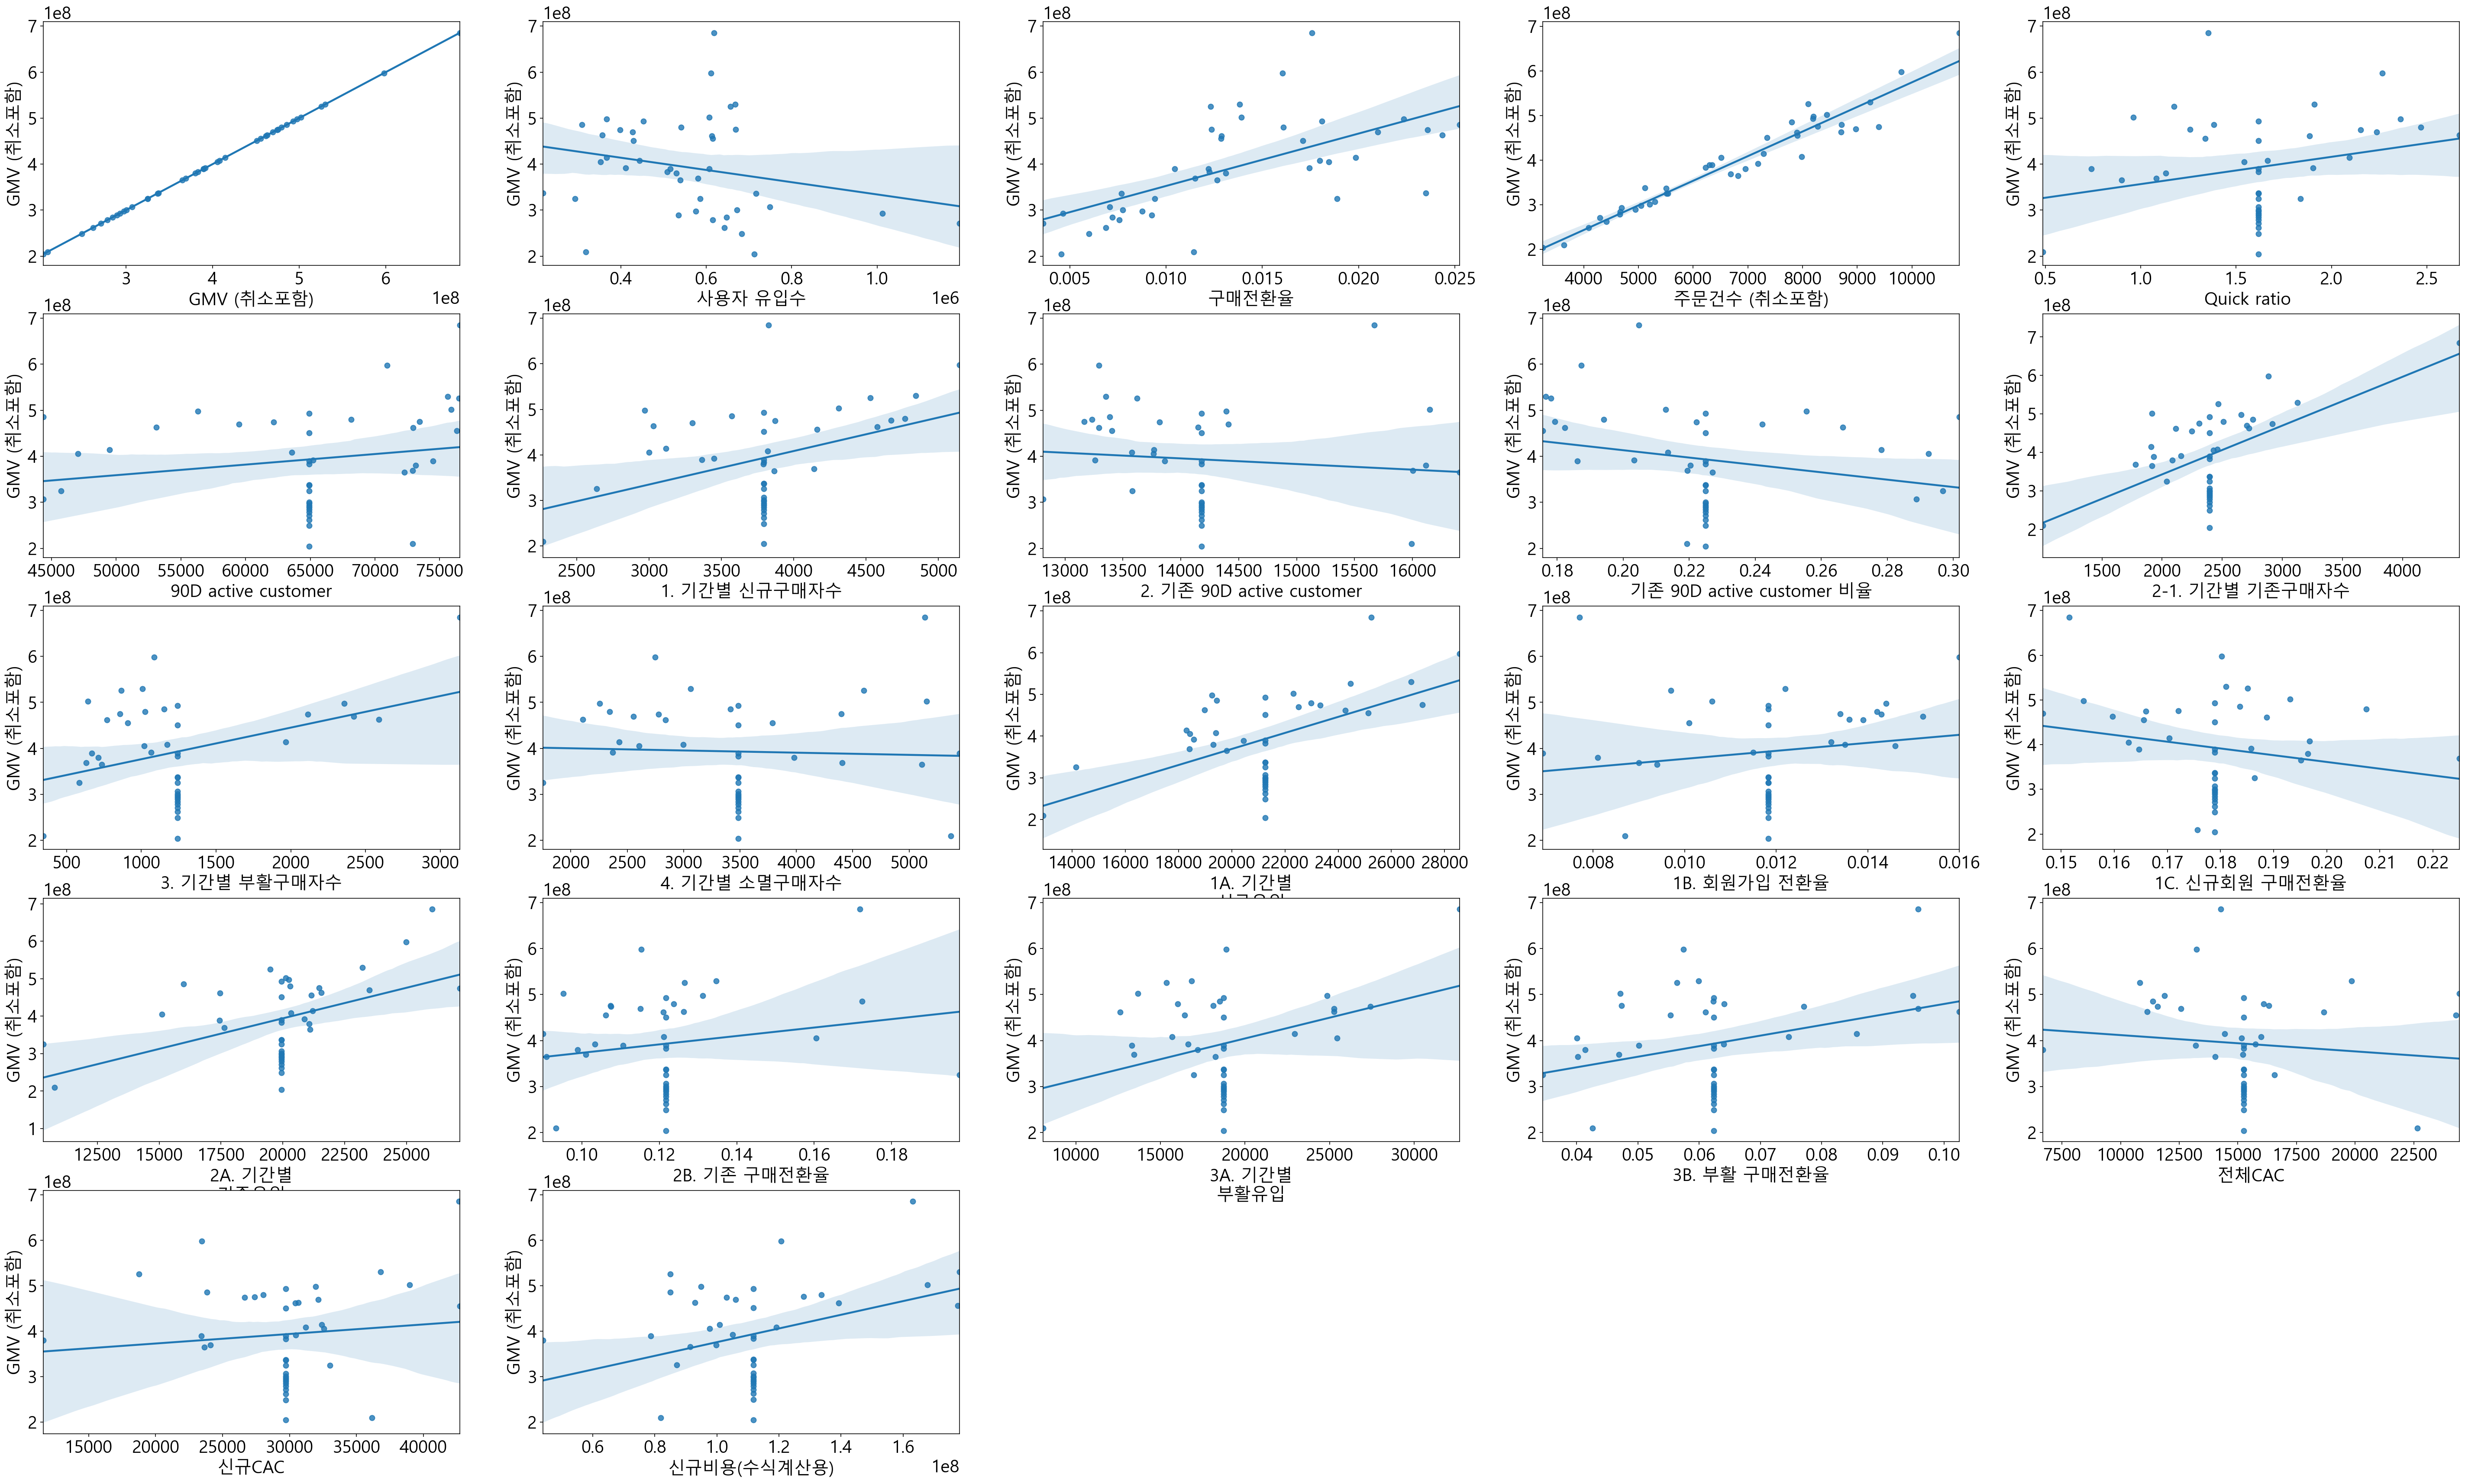

In [6]:
fig = plt.figure(figsize = [50,30])
plt.rc('font', size=20) 
for i, col in enumerate(train.columns):
    
    ax1 = fig.add_subplot(5, 5, i+1)
    ax1 = sns.regplot(x = col , y = "GMV (취소포함)", data = train)
    ax1 = plt.xlabel(col)

In [9]:
train.corr().head(1).T.sort_values(by = "GMV (취소포함)", ascending = False)

,GMV (취소포함)
GMV (취소포함),1.000000
주문건수 (취소포함),0.967585
구매전환율,0.630177
2-1. 기간별 기존구매자수,0.573459
1A. 기간별\n신규유입,0.533701
2A. 기간별\n기존유입,0.471309
1. 기간별 신규구매자수,0.390734
3. 기간별 부활구매자수,0.365125
3A. 기간별\n부활유입,0.361691
신규비용(수식계산용),0.361277


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

search=50
hyperparameters_list=[]

for random_search in range(search):
    
    max_depth=np.random.randint(low=50,high=100)
    max_features=np.random.uniform(low=0.1,high=1.0)
    n_estimators = np.random.randint(1000, 3000)
    
    model=RandomForestRegressor(n_jobs=-1,
                                random_state=37, 
                                n_estimators=n_estimators,
                                criterion='mse',
                                max_depth=max_depth,
                                max_features=max_features)
    
    model.fit(train_x_std_final, train_y)
    y_predict = model.predict(train_x_std_final)
    score=mean_absolute_error(train_y, y_predict)
   # score=np.sqrt(score)
    
    hyperparameters={"score":score,"n_estimators":n_estimators,"max_depth":max_depth,"max_features":max_features}
    hyperparameters_list.append(hyperparameters)
    print(f"n_estimators={n_estimators},max_depth={max_depth:.6f},max_features={max_features:.6f},score={score:.1f}")
    
pd.DataFrame(hyperparameters_list).sort_values(by = "score", ascending = True).head(5)

n_estimators=2925,max_depth=60.000000,max_features=0.812710,score=16604146.6
n_estimators=2037,max_depth=89.000000,max_features=0.357951,score=15821628.0
n_estimators=1598,max_depth=87.000000,max_features=0.322824,score=15698137.0
n_estimators=1161,max_depth=92.000000,max_features=0.114517,score=15806007.2
n_estimators=2400,max_depth=79.000000,max_features=0.944182,score=16770489.3
n_estimators=1556,max_depth=70.000000,max_features=0.665142,score=16316013.0
n_estimators=1492,max_depth=51.000000,max_features=0.189553,score=15523856.2
n_estimators=2627,max_depth=88.000000,max_features=0.205050,score=15337413.8
n_estimators=1666,max_depth=96.000000,max_features=0.371425,score=15796324.1
n_estimators=2013,max_depth=90.000000,max_features=0.436273,score=15963552.8
n_estimators=1328,max_depth=66.000000,max_features=0.965197,score=16767793.0
n_estimators=1934,max_depth=54.000000,max_features=0.329203,score=15722544.8
n_estimators=2469,max_depth=50.000000,max_features=0.810916,score=16620685.0

,score,n_estimators,max_depth,max_features
42,1.530625e+07,2143,57,0.234811
7,1.533741e+07,2627,88,0.205050
34,1.534358e+07,2201,80,0.215436
40,1.534912e+07,2824,57,0.220743
41,1.535287e+07,2849,73,0.246041


In [10]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=37,
                              n_estimators=2143,
                              criterion='mse',
                              max_depth=57,
                              max_features=0.234811)
    
model.fit(train_x_std_final, train_y)
y_predict = model.predict(train_x_std_final)

final = pd.DataFrame({"columns" :train_x_std_final.columns.tolist(), "model_1" : model.feature_importances_}).sort_values(by = "model_1", ascending = False)
final

,columns,model_1
14,구매전환율,0.240131
1,1A. 기간별\n신규유입,0.102007
4,2-1. 기간별 기존구매자수,0.096885
16,사용자 유입수,0.096104
0,1. 기간별 신규구매자수,0.059487
6,2A. 기간별\n기존유입,0.052151
15,기존 90D active customer 비율,0.043356
18,신규비용(수식계산용),0.040356
19,전체CAC,0.033866
12,90D active customer,0.031840


In [11]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=37,
                              n_estimators=2627,
                              criterion='mse',
                              max_depth=88,
                              max_features=0.205050)
    
model.fit(train_x_std_final, train_y)
y_predict = model.predict(train_x_std_final)

final2 = pd.DataFrame({"columns" :train_x_std_final.columns.tolist(), "model_2" : model.feature_importances_}).sort_values(by = "model_2", ascending = False)
final2

,columns,model_2
14,구매전환율,0.241056
1,1A. 기간별\n신규유입,0.101640
4,2-1. 기간별 기존구매자수,0.096429
16,사용자 유입수,0.094829
0,1. 기간별 신규구매자수,0.059343
6,2A. 기간별\n기존유입,0.051440
15,기존 90D active customer 비율,0.044675
18,신규비용(수식계산용),0.039348
19,전체CAC,0.033498
12,90D active customer,0.031714


In [12]:
pd.merge(final, final2, how = "left", on = "columns")

,columns,model_1,model_2
0,구매전환율,0.240131,0.241056
1,1A. 기간별\n신규유입,0.102007,0.101640
2,2-1. 기간별 기존구매자수,0.096885,0.096429
3,사용자 유입수,0.096104,0.094829
4,1. 기간별 신규구매자수,0.059487,0.059343
5,2A. 기간별\n기존유입,0.052151,0.051440
6,기존 90D active customer 비율,0.043356,0.044675
7,신규비용(수식계산용),0.040356,0.039348
8,전체CAC,0.033866,0.033498
9,90D active customer,0.031840,0.031714
